<a href="https://colab.research.google.com/github/Cieliocas/DSLearn/blob/main/Pandas_IO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Creating the Names

In [2]:
import pandas as pd

In [3]:
nomes_m = pd.read_json("https://servicodados.ibge.gov.br/api/v1/censos/nomes/ranking?qtd=200&sexo=m")
nomes_f = pd.read_json("https://servicodados.ibge.gov.br/api/v1/censos/nomes/ranking?qtd=200&sexo=f")

In [4]:
print("Quantidade de nomes: " + str(len(nomes_f) + len(nomes_m)))

Quantidade de nomes: 400


In [5]:
frames = [nomes_f, nomes_m]

In [6]:
nomes = pd.concat(frames)['nome'].to_frame()

In [7]:
nomes.sample(5)

,nome
196,ARLINDO
149,ISRAEL
159,SELMA
30,ANDERSON
177,JENIFER


# Including student ID

In [8]:
import numpy as np
np.random.seed(123)

In [9]:
total_alunos = len(nomes)
total_alunos

400

In [10]:
nomes["id_aluno"] = np.random.permutation(total_alunos) + 1

In [11]:
dominios = ['@emaildomain.com.br', '@emailservice.com']
nomes['dominio'] = np.random.choice(dominios, total_alunos)

In [12]:
nomes['email'] = nomes.nome.str.cat(nomes.dominio).str.lower()

In [13]:
nomes

,nome,id_aluno,dominio,email
0,MARIA,235,@emaildomain.com.br,maria@emaildomain.com.br
1,ANA,43,@emailservice.com,ana@emailservice.com
2,FRANCISCA,304,@emailservice.com,francisca@emailservice.com
3,ANTONIA,156,@emailservice.com,antonia@emailservice.com
4,ADRIANA,343,@emailservice.com,adriana@emailservice.com
...,...,...,...,...
195,WALTER,231,@emaildomain.com.br,walter@emaildomain.com.br
196,ARLINDO,99,@emailservice.com,arlindo@emailservice.com
197,MICHAEL,323,@emaildomain.com.br,michael@emaildomain.com.br
198,ALVARO,383,@emailservice.com,alvaro@emailservice.com


# Creating the Courses Table

In [14]:
!pip3 install html5lib
!pip3 install lxml

In [15]:
import html5lib

In [16]:
url = 'http://tabela-cursos.herokuapp.com/index.html'

In [17]:
cursos = pd.read_html(url)

In [18]:
cursos

[                          Nome do curso
 0                 Lógica de programação
 1                         Java para Web
 2                           C# para Web
 3                         Ruby on Rails
 4                      Cursos de Python
 5                         PHP com MySql
 6                         .NET para web
 7            Novas integrações com Java
 8                          TDD com Java
 9                   Código limpo com C#
 10  Preparatório para certificação Java
 11                      Hardware básico
 12                Persistência com .NET
 13                  Desenvolvendo jogos
 14                     Análise de dados
 15                   Estatística básica
 16                  Internet das coisas
 17                Programação funcional
 18                Boas práticas em Java
 19          Orientação objetos com Java]

In [19]:
type(cursos)

list

In [20]:
cursos = cursos[0]

In [21]:
type(cursos)

pandas.core.frame.DataFrame

In [22]:
cursos.head()

,Nome do curso
0,Lógica de programação
1,Java para Web
2,C# para Web
3,Ruby on Rails
4,Cursos de Python


# Changing Course Index 

In [23]:
cursos = cursos.rename(columns={'Nome do curso' : 'nome_do_curso'})

In [24]:
cursos.head(2)

,nome_do_curso
0,Lógica de programação
1,Java para Web


In [25]:
cursos['id'] = cursos.index + 1

In [26]:
cursos.head()

,nome_do_curso,id
0,Lógica de programação,1
1,Java para Web,2
2,C# para Web,3
3,Ruby on Rails,4
4,Cursos de Python,5


In [27]:
cursos = cursos.set_index('id')

In [28]:
cursos.head()

,nome_do_curso
id,
1,Lógica de programação
2,Java para Web
3,C# para Web
4,Ruby on Rails
5,Cursos de Python


# Enrolling students in courses

In [29]:
nomes.sample(5)

,nome,id_aluno,dominio,email
46,FABIANA,358,@emailservice.com,fabiana@emailservice.com
38,DIEGO,294,@emaildomain.com.br,diego@emaildomain.com.br
136,NILTON,271,@emaildomain.com.br,nilton@emaildomain.com.br
119,MOISES,4,@emailservice.com,moises@emailservice.com
101,GISELE,298,@emailservice.com,gisele@emailservice.com


In [30]:
nomes['matriculas'] =  np.ceil(np.random.exponential(size = total_alunos)* 1.5).astype(int)

In [31]:
nomes.sample(5)

,nome,id_aluno,dominio,email,matriculas
153,CAUA,77,@emailservice.com,caua@emailservice.com,2
36,DEBORA,338,@emaildomain.com.br,debora@emaildomain.com.br,1
135,ROSILENE,387,@emailservice.com,rosilene@emailservice.com,2
176,CELIO,388,@emailservice.com,celio@emailservice.com,3
144,VINICIOS,147,@emailservice.com,vinicios@emailservice.com,1


In [32]:
nomes.matriculas.describe()

count    400.000000
mean       1.920000
std        1.460799
min        1.000000
25%        1.000000
50%        1.000000
75%        2.000000
max       10.000000
Name: matriculas, dtype: float64

In [33]:
import seaborn as sns

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


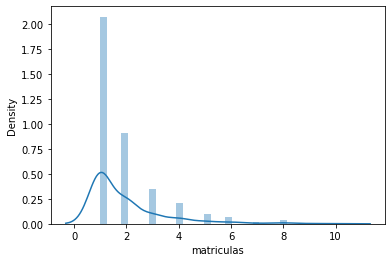

In [34]:
sns.distplot(nomes.matriculas)

In [35]:
nomes.matriculas.value_counts()

1     220
2      96
3      37
4      22
5      10
6       7
8       4
7       2
10      1
9       1
Name: matriculas, dtype: int64

In [36]:
nomes.sample(5)

,nome,id_aluno,dominio,email,matriculas
194,CLARA,277,@emailservice.com,clara@emailservice.com,1
64,ROBSON,290,@emailservice.com,robson@emailservice.com,1
13,DANIEL,195,@emailservice.com,daniel@emailservice.com,1
98,GILSON,134,@emaildomain.com.br,gilson@emaildomain.com.br,2
33,NATALIA,192,@emaildomain.com.br,natalia@emaildomain.com.br,1


# Selecting courses

In [39]:
nomes.sample(5)

,nome,id_aluno,dominio,email,matriculas
69,REGINALDO,170,@emaildomain.com.br,reginaldo@emaildomain.com.br,1
17,FELIPE,113,@emaildomain.com.br,felipe@emaildomain.com.br,2
136,NILTON,271,@emaildomain.com.br,nilton@emaildomain.com.br,2
15,LETICIA,347,@emailservice.com,leticia@emailservice.com,1
149,ISRAEL,65,@emailservice.com,israel@emailservice.com,2


In [48]:
todas_matriculas = []
x = np.random.rand(20)
prob = x / sum(x)

In [49]:
for index, row in nomes.iterrows():
  id = row.id_aluno
  matriculas = row.matriculas
  for i in range(matriculas):
    mat = [id, np.random.choice(cursos.index, p = prob)]
    todas_matriculas.append(mat)

matriculas = pd.DataFrame(todas_matriculas, columns = ['id_aluno', 'id_curso'])
matriculas.head(5)

,id_aluno,id_curso
0,235,14
1,43,11
2,43,16
3,43,10
4,43,16


In [51]:
matriculas.groupby('id_curso').count().join(cursos['nome_do_curso']).rename(columns={'id_aluno':'quantidade_de_alunos'})

,quantidade_de_alunos,nome_do_curso
id_curso,,
1,27,Lógica de programação
2,33,Java para Web
3,29,C# para Web
4,61,Ruby on Rails
5,47,Cursos de Python
6,3,PHP com MySql
7,47,.NET para web
8,27,Novas integrações com Java
9,43,TDD com Java


In [52]:
nomes.sample(5)

,nome,id_aluno,dominio,email,matriculas
116,MARCELA,261,@emaildomain.com.br,marcela@emaildomain.com.br,4
24,CLAUDIA,16,@emaildomain.com.br,claudia@emaildomain.com.br,1
195,ROSANE,227,@emaildomain.com.br,rosane@emaildomain.com.br,3
12,RAFAEL,162,@emaildomain.com.br,rafael@emaildomain.com.br,2
141,NEIDE,325,@emailservice.com,neide@emailservice.com,1


In [53]:
cursos.head(5)

,nome_do_curso
id,
1,Lógica de programação
2,Java para Web
3,C# para Web
4,Ruby on Rails
5,Cursos de Python


In [54]:
matriculas.head()

,id_aluno,id_curso
0,235,14
1,43,11
2,43,16
3,43,10
4,43,16


In [55]:
matriculas_por_curso = matriculas.groupby('id_curso').count().join(cursos['nome_do_curso']).rename(columns={'id_aluno':'quantidade_de_alunos'})

In [56]:
matriculas_por_curso.head()

,quantidade_de_alunos,nome_do_curso
id_curso,,
1,27,Lógica de programação
2,33,Java para Web
3,29,C# para Web
4,61,Ruby on Rails
5,47,Cursos de Python


# Output in different formats

In [57]:
matriculas_por_curso.head()

,quantidade_de_alunos,nome_do_curso
id_curso,,
1,27,Lógica de programação
2,33,Java para Web
3,29,C# para Web
4,61,Ruby on Rails
5,47,Cursos de Python


In [58]:
matriculas_por_curso.to_csv('matriculas_por_curso.csv', index=False)

In [59]:
pd.read_csv('matriculas_por_curso.csv')

,quantidade_de_alunos,nome_do_curso
0,27,Lógica de programação
1,33,Java para Web
2,29,C# para Web
3,61,Ruby on Rails
4,47,Cursos de Python
5,3,PHP com MySql
6,47,.NET para web
7,27,Novas integrações com Java
8,43,TDD com Java
9,41,Código limpo com C#


In [60]:
matriculas_json = matriculas_por_curso.to_json()
matriculas_json

'{"quantidade_de_alunos":{"1":27,"2":33,"3":29,"4":61,"5":47,"6":3,"7":47,"8":27,"9":43,"10":41,"11":50,"12":54,"13":51,"14":45,"15":18,"16":67,"17":29,"18":36,"19":45,"20":15},"nome_do_curso":{"1":"L\\u00f3gica de programa\\u00e7\\u00e3o","2":"Java para Web","3":"C# para Web","4":"Ruby on Rails","5":"Cursos de Python","6":"PHP com MySql","7":".NET para web","8":"Novas integra\\u00e7\\u00f5es com Java","9":"TDD com Java","10":"C\\u00f3digo limpo com C#","11":"Preparat\\u00f3rio para certifica\\u00e7\\u00e3o Java","12":"Hardware b\\u00e1sico","13":"Persist\\u00eancia com .NET","14":"Desenvolvendo jogos","15":"An\\u00e1lise de dados","16":"Estat\\u00edstica b\\u00e1sica","17":"Internet das coisas","18":"Programa\\u00e7\\u00e3o funcional","19":"Boas pr\\u00e1ticas em Java","20":"Orienta\\u00e7\\u00e3o objetos com Java"}}'

In [61]:
matriculas_html = matriculas_por_curso.to_html()
matriculas_html

'<table border="1" class="dataframe">\n  <thead>\n    <tr style="text-align: right;">\n      <th></th>\n      <th>quantidade_de_alunos</th>\n      <th>nome_do_curso</th>\n    </tr>\n    <tr>\n      <th>id_curso</th>\n      <th></th>\n      <th></th>\n    </tr>\n  </thead>\n  <tbody>\n    <tr>\n      <th>1</th>\n      <td>27</td>\n      <td>Lógica de programação</td>\n    </tr>\n    <tr>\n      <th>2</th>\n      <td>33</td>\n      <td>Java para Web</td>\n    </tr>\n    <tr>\n      <th>3</th>\n      <td>29</td>\n      <td>C# para Web</td>\n    </tr>\n    <tr>\n      <th>4</th>\n      <td>61</td>\n      <td>Ruby on Rails</td>\n    </tr>\n    <tr>\n      <th>5</th>\n      <td>47</td>\n      <td>Cursos de Python</td>\n    </tr>\n    <tr>\n      <th>6</th>\n      <td>3</td>\n      <td>PHP com MySql</td>\n    </tr>\n    <tr>\n      <th>7</th>\n      <td>47</td>\n      <td>.NET para web</td>\n    </tr>\n    <tr>\n      <th>8</th>\n      <td>27</td>\n      <td>Novas integrações com Java</td>\n 

In [62]:
print(matriculas_html)

<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>quantidade_de_alunos</th>
      <th>nome_do_curso</th>
    </tr>
    <tr>
      <th>id_curso</th>
      <th></th>
      <th></th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>1</th>
      <td>27</td>
      <td>Lógica de programação</td>
    </tr>
    <tr>
      <th>2</th>
      <td>33</td>
      <td>Java para Web</td>
    </tr>
    <tr>
      <th>3</th>
      <td>29</td>
      <td>C# para Web</td>
    </tr>
    <tr>
      <th>4</th>
      <td>61</td>
      <td>Ruby on Rails</td>
    </tr>
    <tr>
      <th>5</th>
      <td>47</td>
      <td>Cursos de Python</td>
    </tr>
    <tr>
      <th>6</th>
      <td>3</td>
      <td>PHP com MySql</td>
    </tr>
    <tr>
      <th>7</th>
      <td>47</td>
      <td>.NET para web</td>
    </tr>
    <tr>
      <th>8</th>
      <td>27</td>
      <td>Novas integrações com Java</td>
    </tr>
    <tr>
      <th>9</th>
      <td>43</td>
 

# Creating SQL Database

In [63]:
!pip3 install sqlalchemy

In [64]:
from sqlalchemy import create_engine, MetaData, Table, inspect # adicionando o método inspect
engine = create_engine('sqlite:///:memory:')
matriculas_por_curso.to_sql('matriculas', engine)
inspector = inspect(engine) # criando um Inspector object
print(inspector.get_table_names()) # Exibindo as tabelas com o inspecto

['matriculas']


In [65]:
engine

Engine(sqlite:///:memory:)

In [66]:
type(engine)

sqlalchemy.engine.base.Engine

# Searching from SQL database

In [70]:
query = 'select * from matriculas where quantidade_de_alunos < 20'

In [72]:
pd.read_sql(query, engine)

,id_curso,quantidade_de_alunos,nome_do_curso
0,6,3,PHP com MySql
1,15,18,Análise de dados
2,20,15,Orientação objetos com Java


In [73]:
pd.read_sql_table('matriculas', engine, columns=['nome_do_curso', 'quantidade_de_alunos'])

,nome_do_curso,quantidade_de_alunos
0,Lógica de programação,27
1,Java para Web,33
2,C# para Web,29
3,Ruby on Rails,61
4,Cursos de Python,47
5,PHP com MySql,3
6,.NET para web,47
7,Novas integrações com Java,27
8,TDD com Java,43
9,Código limpo com C#,41


In [74]:
muitas_matriculas = pd.read_sql_table('matriculas', engine, columns=['nome_do_curso', 'quantidade_de_alunos'])

In [75]:
muitas_matriculas

,nome_do_curso,quantidade_de_alunos
0,Lógica de programação,27
1,Java para Web,33
2,C# para Web,29
3,Ruby on Rails,61
4,Cursos de Python,47
5,PHP com MySql,3
6,.NET para web,47
7,Novas integrações com Java,27
8,TDD com Java,43
9,Código limpo com C#,41


In [79]:
muitas_matriculas = muitas_matriculas.query('quantidade_de_alunos > 60')

In [80]:
muitas_matriculas

,nome_do_curso,quantidade_de_alunos
3,Ruby on Rails,61
15,Estatística básica,67


# Writing in the sql database

In [81]:
muitas_matriculas.to_sql('muitas_matriculas', con=engine)

In [82]:
print(engine.table_names())

['matriculas', 'muitas_matriculas']


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SADeprecationWarning: The Engine.table_names() method is deprecated and will be removed in a future release.  Please refer to Inspector.get_table_names(). (deprecated since: 1.4)
  """Entry point for launching an IPython kernel.


In [ ]:
# Aprendemos como utilizar o pandas para ler e escrever em um banco sql

# Utilizamos o banco SQLite que vem com o pandas e criamos um banco local

# Salvamos o DataFrame de matriculas com o comando matriculas_por_curso.to_sql('matriculas', engine)

# Lemos uma tabela do banco com a função read_sql_table() e exibimos o resultado de uma query com o comando read_sql(), passando a query como parâmetro

# Names of students from the next class

In [83]:
matriculas_por_curso.head()

,quantidade_de_alunos,nome_do_curso
id_curso,,
1,27,Lógica de programação
2,33,Java para Web
3,29,C# para Web
4,61,Ruby on Rails
5,47,Cursos de Python


In [84]:
matriculas.head()

,id_aluno,id_curso
0,235,14
1,43,11
2,43,16
3,43,10
4,43,16


In [85]:
id_curso = 16
proxima_turma = matriculas.query("id_curso == {}".format(id_curso))

In [86]:
proxima_turma

,id_aluno,id_curso
2,43,16
4,43,16
10,156,16
25,185,16
33,10,16
...,...,...
742,74,16
754,107,16
762,18,16
763,231,16


In [87]:
nomes.sample(3)

,nome,id_aluno,dominio,email,matriculas
159,SELMA,118,@emailservice.com,selma@emailservice.com,1
24,FABIO,400,@emailservice.com,fabio@emailservice.com,2
170,ALEXANDRO,341,@emailservice.com,alexandro@emailservice.com,1


In [88]:
proxima_turma.set_index('id_aluno').join(nomes.set_index('id_aluno'))

,id_curso,nome,dominio,email,matriculas
id_aluno,,,,,
10,16,MARIANA,@emailservice.com,mariana@emailservice.com,3
18,16,ODAIR,@emailservice.com,odair@emailservice.com,1
19,16,VALMIR,@emaildomain.com.br,valmir@emaildomain.com.br,3
20,16,BENEDITA,@emailservice.com,benedita@emailservice.com,3
43,16,ANA,@emailservice.com,ana@emailservice.com,4
...,...,...,...,...,...
350,16,CRISTIANE,@emaildomain.com.br,cristiane@emaildomain.com.br,3
380,16,ELZA,@emaildomain.com.br,elza@emaildomain.com.br,1
383,16,ALVARO,@emailservice.com,alvaro@emailservice.com,1


In [89]:
proxima_turma.set_index('id_aluno').join(nomes.set_index('id_aluno'))['nome']

id_aluno
10       MARIANA
18         ODAIR
19        VALMIR
20      BENEDITA
43           ANA
         ...    
350    CRISTIANE
380         ELZA
383       ALVARO
385       MICHEL
397       LILIAN
Name: nome, Length: 67, dtype: object

In [90]:
proxima_turma.set_index('id_aluno').join(nomes.set_index('id_aluno'))['nome'].to_frame()

,nome
id_aluno,
10,MARIANA
18,ODAIR
19,VALMIR
20,BENEDITA
43,ANA
...,...
350,CRISTIANE
380,ELZA
383,ALVARO


In [91]:
nome_curso = cursos.loc[id_curso]
nome_curso

nome_do_curso    Estatística básica
Name: 16, dtype: object

In [92]:
nome_curso = nome_curso.nome_do_curso
nome_curso

'Estatística básica'

In [93]:
proxima_turma = proxima_turma.set_index('id_aluno').join(nomes.set_index('id_aluno'))['nome'].to_frame()

In [94]:
proxima_turma.rename(columns = {'nome':'Alunos do curso de {}'.format(nome_curso)})

,Alunos do curso de Estatística básica
id_aluno,
10,MARIANA
18,ODAIR
19,VALMIR
20,BENEDITA
43,ANA
...,...
350,CRISTIANE
380,ELZA
383,ALVARO


In [95]:
proxima_turma = proxima_turma.rename(columns = {'nome':'Alunos do curso de {}'.format(nome_curso)})

In [96]:
proxima_turma.sample(5)

,Alunos do curso de Estatística básica
id_aluno,
204,CLAUDIO
321,FERNANDO
385,MICHEL
45,TERESINHA
166,ROSANA


# Excel

In [97]:
proxima_turma.to_excel('proxima_turma.xlsx', index = False)

In [98]:
pd.read_excel('proxima_turma.xlsx')

,Alunos do curso de Estatística básica
0,MARIANA
1,ODAIR
2,VALMIR
3,BENEDITA
4,ANA
...,...
62,CRISTIANE
63,ELZA
64,ALVARO
65,MICHEL
